### Understanding Chaining ⛓️‍💥 And Runnables 🏃🏻

<img src="./Images/Chains.png" width="800" height="400" style="display: block; margin: auto;">

### Load ENV file

In [5]:
from dotenv import load_dotenv
import os
load = load_dotenv('./../.env')

print(os.getenv("LANGSMITH_API_KEY"))

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


#### Create LLM object

In [2]:
from langchain_ollama import ChatOllama

llm = ChatOllama(
    base_url="http://localhost:11434",
    model = "qwen2.5:latest",
    temperature=0.5,
    max_tokens = 250
)

llm2 = ChatOllama(
    base_url="http://localhost:11434",
    model = "llama3.2:latest",
    temperature=0.5,
    max_tokens = 250
)


## Understanding Chaining & Runnables

In [3]:
from langchain_core.prompts import (
    ChatPromptTemplate
)

# 1 way of doing it
prompt_template = ChatPromptTemplate([
    ("system", "You are an LLM expert"),
    ("user", "What is the advantage of running AI Models in {env}")
])

# Without Chaining
# prompt = prompt_template.invoke({"env": "local machine"})

# content = llm.invoke(prompt).content

# Chaining mechanism
chain = prompt_template | llm 

chain.invoke({"env": "local machine"})


AIMessage(content="Running AI models on a local machine has several advantages, including:\n\n1. **Privacy and Security**: Running models locally means that sensitive data does not need to be transmitted over the network, which can enhance privacy and security.\n\n2. **Data Control**: You have full control over the data used in training or inference. This is particularly important if the data contains personal information or other sensitive details.\n\n3. **Latency and Speed**: Local execution can significantly reduce latency because there is no need to send requests over a network, which can be especially beneficial for real-time applications.\n\n4. **Resource Management**: You have complete control over the hardware resources (CPU, GPU, memory) used by your model. This allows you to optimize resource usage according to your specific needs and constraints.\n\n5. **Offline Capability**: Local execution means that models can run even when there is no internet connection or when network 

### String Parsing

In [4]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

prompt_template = ChatPromptTemplate([
    ("system", "You are an LLM expert"),
    ("user", "What is the advantage of running AI Models in {env}")
])

chain = prompt_template | llm | StrOutputParser()

response = chain.invoke({"env": "local machine"})

print(response)


Running AI models on a local machine can offer several advantages, depending on your specific use case. Here are some key benefits:

1. **Data Privacy and Security**: Running models locally means that sensitive data does not need to be transmitted over the internet or stored in cloud services, which can enhance privacy and security.

2. **Control Over Data**: When you run AI models locally, you have full control over how and when the data is used. This can be crucial for compliance with regulations like GDPR or HIPAA.

3. **Latency Reduction**: Local processing can significantly reduce latency compared to cloud-based solutions because there's no need to wait for network requests to complete. This is particularly important in real-time applications where response times are critical.

4. **Cost Efficiency**: For smaller datasets and simpler models, running locally might be more cost-effective than using cloud services, which often charge based on usage.

5. **Customization and Flexibilit

### Chaining Multiple Chains

In [7]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

prompt_template = ChatPromptTemplate([
    ("system", "You are an LLM expert"),
    ("user", "What is the advantage of running AI Models in {env}")
])

# Chain 1
detailedResponseChain = prompt_template | llm | StrOutputParser()

headingInfoTemplate = ChatPromptTemplate.from_template("""
                                         Analyse the response and get me just the heading from the {response}
                                         
                                         Response should be in bullet points
                                         """)

# Chain 2
chainWithHeading = {"response": detailedResponseChain } | headingInfoTemplate | llm | StrOutputParser()

response = chainWithHeading.invoke({"env": "local machine"})

print(response)



- **Data Privacy and Security**
- **Control over Data Handling**
- **Latency Reduction**
- **Cost Efficiency**
- **Customization and Flexibility**
- **Offline Capabilities**
- **Debugging and Testing**
- **Resource Management**
- **Compliance with Regulations**
- **Performance Optimization**


### Running chains in Parallel

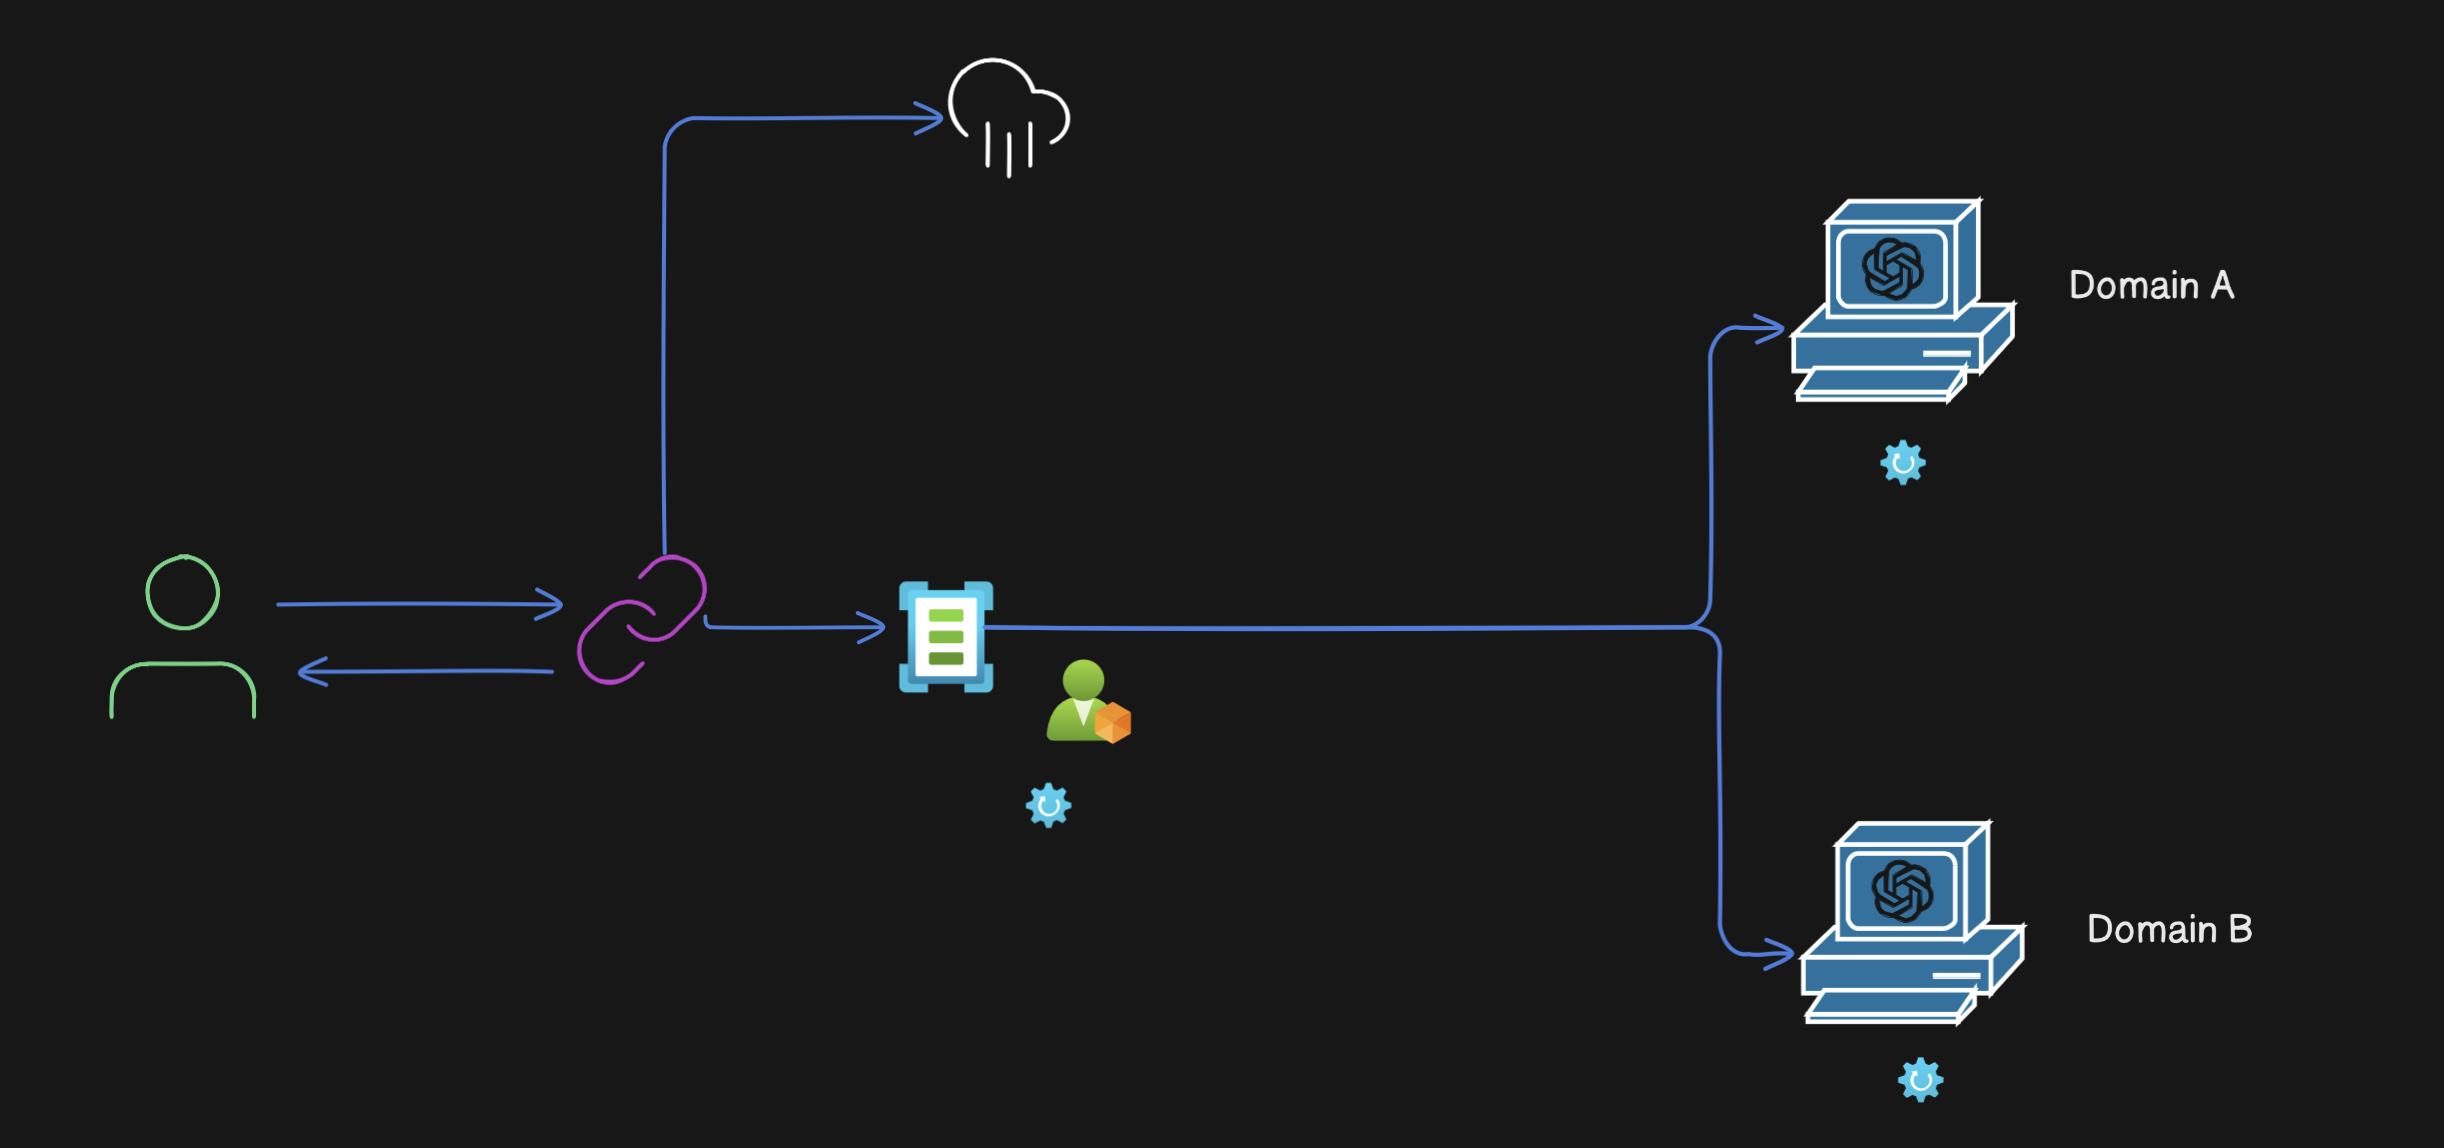

In [13]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnableParallel

prompt_template = ChatPromptTemplate([
    ("system", "You are an LLM expert"),
    ("user", "What is the advantage of running AI Models in {env}")
])

# Chain 1
detailedResponseChain = prompt_template | llm | StrOutputParser()

headingInfoTemplate = ChatPromptTemplate.from_template("""
                                         Analyse the response and get me just the heading from the {response}
                                         
                                         Response should be in bullet points
                                         """)

# Chain 2
chainWithHeading = {"response": detailedResponseChain } | headingInfoTemplate | llm2 | StrOutputParser()

parallelRunnable = RunnableParallel(chain1=detailedResponseChain, chain2=chainWithHeading)

response = parallelRunnable.invoke({"env": "local machine"})

print(response['chain1'])
print("\n\n")
print(response['chain2'])



Running AI models on a local machine has several advantages, depending on the specific use case and context. Here are some key benefits:

1. **Data Privacy and Security**: Running models locally means that sensitive data does not need to be sent over networks or stored externally, which can enhance privacy and security.

2. **Control Over Data**: Local execution allows you to have full control over how data is used and processed, without relying on third-party services or cloud providers.

3. **Latency Reduction**: Local inference reduces the latency associated with sending requests to a remote server and waiting for responses, as all processing happens on your own machine.

4. **Customization and Flexibility**: You can tailor the model and its environment to fit specific needs without being constrained by platform limitations or service provider policies.

5. **Cost Efficiency**: For small-scale applications or prototyping, local execution can be more cost-effective than cloud service

In [15]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnableParallel

localMachineTemplate = ChatPromptTemplate([
    ("system", "You are an LLM expert"),
    ("user", "What is the advantage of running AI Models in {env}")
])

# Chain 1
localMachineChain = localMachineTemplate | llm | StrOutputParser()

cloudMachineTemplate = ChatPromptTemplate.from_template("""
                                         What is the advantage of running LLM in {machine}
                                         """)

# Chain 2
cloudMachineChain = cloudMachineTemplate | llm2 | StrOutputParser()

parallelRunnable = RunnableParallel(chain1=localMachineChain, chain2=cloudMachineChain)

response = parallelRunnable.invoke({"env": "local machine", "machine": "cloud machine"})

print(response['chain1'])
print("\n\n")
print(response['chain2'])

Running AI models on a local machine has several advantages, including:

1. **Privacy and Security**: Running models locally ensures that sensitive data does not leave your device, which can be crucial for handling personal or confidential information.

2. **Control Over Data**: You have full control over the data used by the model, allowing you to manage its usage and ensure compliance with data protection regulations like GDPR.

3. **Offline Use**: Local models can operate without an internet connection, making them useful in scenarios where network connectivity is unreliable or unavailable.

4. **Customization and Fine-Tuning**: You have greater flexibility to customize and fine-tune the model according to your specific needs, as you are not constrained by cloud provider limitations.

5. **Performance Optimization**: You can optimize the performance of the model for your specific hardware, potentially achieving better speed and efficiency compared to running on a remote server.

6. 

### Runnable Lambda

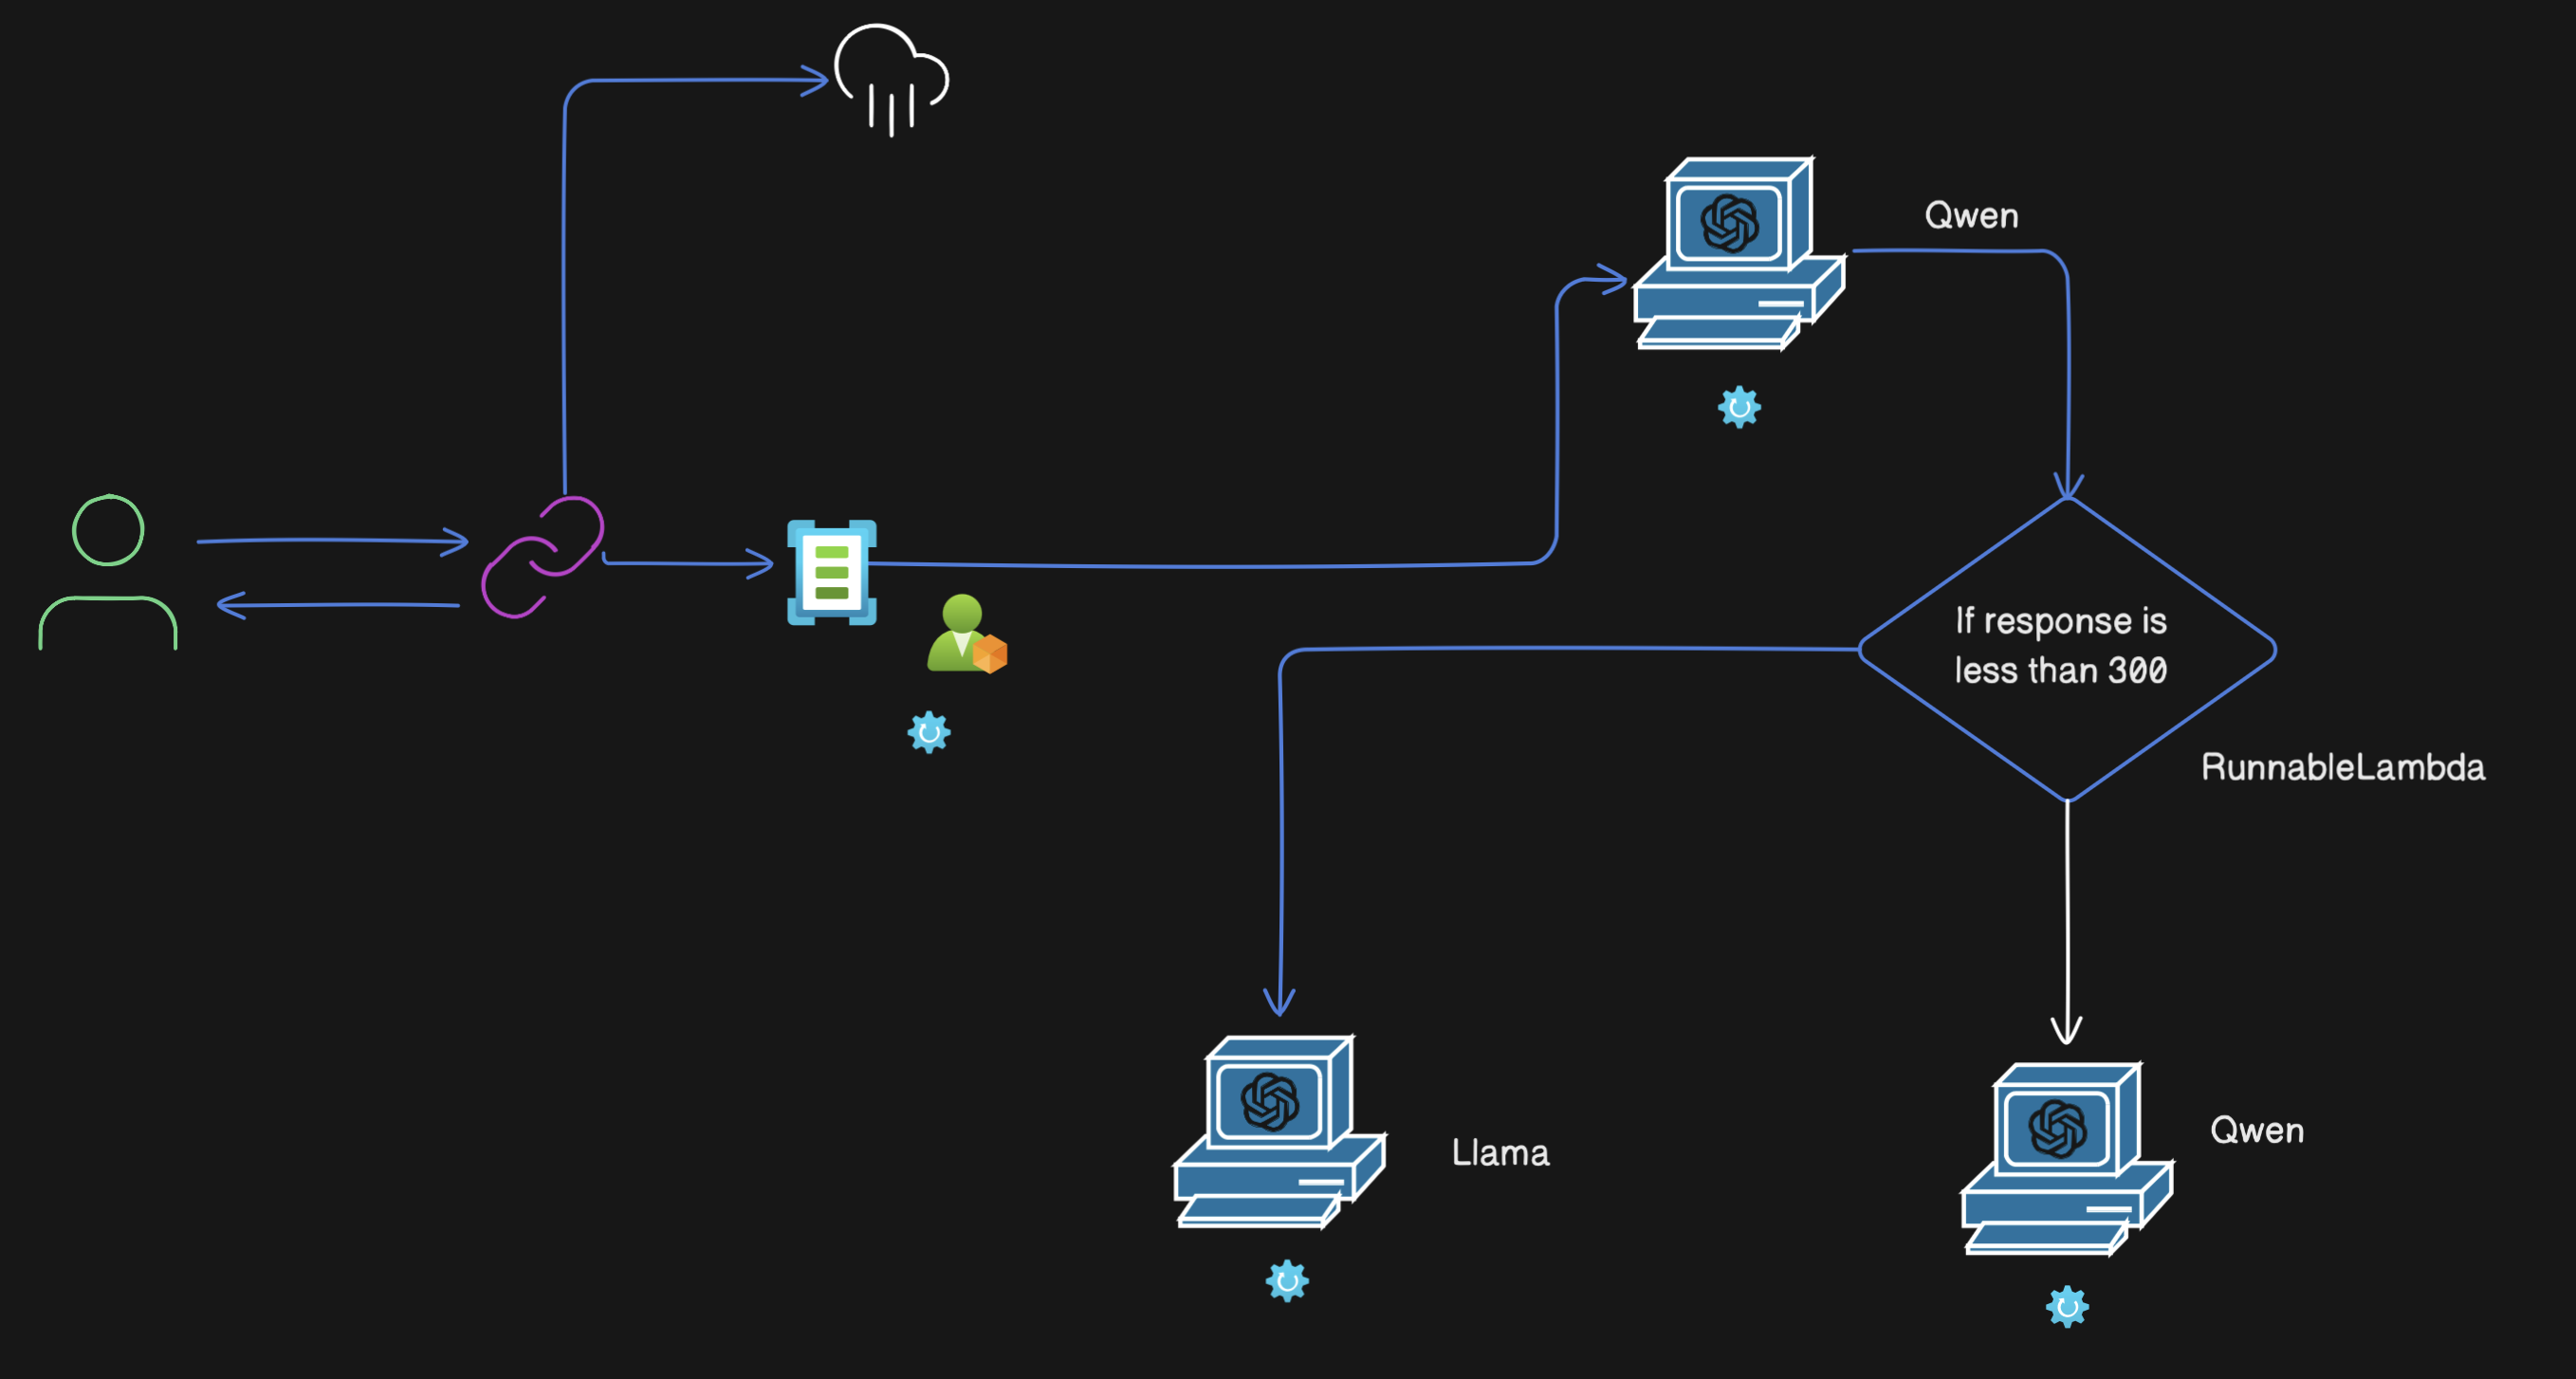

In [3]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnableLambda

prompt_template = ChatPromptTemplate([
    ("system", "You are an LLM expert"),
    ("user", "What is the advantage of running AI Models in {env}")
])

# Chain 1
detailedResponseChain = prompt_template | llm | StrOutputParser()

headingInfoTemplate = ChatPromptTemplate.from_template("""
                                         Analyse the response and get me just the heading from the {response}
                                         
                                         Response should be in bullet points
                                         """)
def choose_llm(response):
    response_text = str(response)
    if len(response_text) < 300:
        return llm2
    return llm

llm_selector = RunnableLambda(choose_llm)


# Chain 2
chainWithHeading = {"response": detailedResponseChain } | headingInfoTemplate | choose_llm | StrOutputParser()

response = chainWithHeading.invoke({"env": "local machine"})

print(response)



- Privacy and Security
- Data Control
- Latency and Speed
- Cost Efficiency
- Customization and Flexibility
- On-Premises Scalability
- No Dependency on Internet Connectivity


### Using @Chain decorator

In [4]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import chain

prompt_template = ChatPromptTemplate([
    ("system", "You are an LLM expert"),
    ("user", "What is the advantage of running AI Models in {env}")
])

# Chain 1
detailedResponseChain = prompt_template | llm | StrOutputParser()

headingInfoTemplate = ChatPromptTemplate.from_template("""
                                         Analyse the response and get me just the heading from the {response}
                                         
                                         Response should be in bullet points
                                       """)
@chain
def choose_llm(response):
    response_text = str(response)
    if len(response_text) < 300:
        return llm2
    return llm

# Chain 2
chainWithHeading = {"response": detailedResponseChain } | headingInfoTemplate | choose_llm | StrOutputParser()

response = chainWithHeading.invoke({"env": "local machine"})

print(response)



- **Data Privacy and Security**
- **Control and Customization**
- **Cost Efficiency**
- **Offline Operation**
- **Performance and Latency**
- **Resource Management**
- **Debugging and Testing**
- **Compliance and Legal Requirements**
